In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torch.optim as optim
import os

In [55]:
image_dir = "cavallo"

images = []
for filename in os.listdir(image_dir):
    image_path = os.path.join(image_dir, filename)
    image = cv2.imread(image_path)
    
    if image is not None:
        image = cv2.resize(image, (120, 120))
        images.append(image)

    if len(images) == 100:
        break

print("Number of images read:", len(images))

Number of images read: 100


In [56]:
def divide_image(image):
    parts = []
    height, width, _ = image.shape
    part_height = height // 3
    part_width = width // 3
    
    for i in range(3):
        for j in range(3):
            part = image[i*part_height:(i+1)*part_height, j*part_width:(j+1)*part_width]
            parts.append(part)
    
    return parts

In [57]:
def generate_combinations(parts, num_combinations):
    original_positions = []
    indices = list(range(len(parts)))
    
    for _ in range(num_combinations):
        random.shuffle(indices)
        original_positions.append(indices.copy())
    
    return original_positions

In [58]:
input_data = []
target_data = []
non_converted_target_data = []
k = 1000000

# choose random image
image = images[random.randint(0, len(images) - 1)]
parts = divide_image(image)
original_positions = generate_combinations(parts, k)

for idx, position in enumerate(original_positions):
    input_data.append(position)

    dummy_target = np.zeros((9, 9), dtype=np.uint8)
    for i in range(9):
        dummy_target[i, original_positions[idx][i]] = 1

    target_data.append(dummy_target.flatten())
    non_converted_target_data.append(original_positions[idx])

In [59]:
np.array(input_data).shape, np.array(target_data).shape

((1000000, 9), (1000000, 81))

In [60]:
shuffled = torch.tensor(np.identity(9).flatten(), dtype=torch.float32)
shuffled

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [61]:
loss = torch.nn.CrossEntropyLoss()
loss_list = []

for i in target_data:
    # convert to tensor
    target = torch.tensor(i, dtype=torch.float32)
    loss_list.append(loss(target, shuffled))


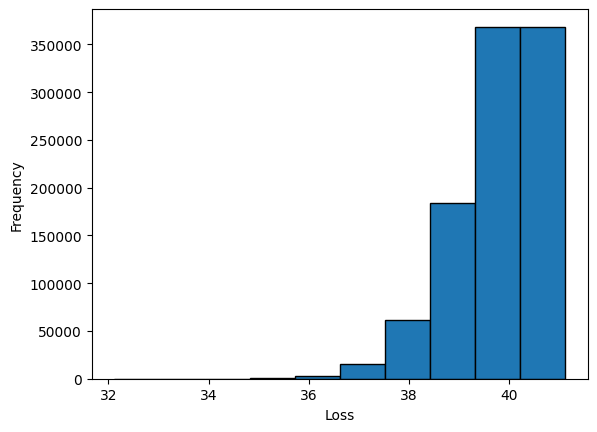

In [64]:
# plot histogram
plt.hist(loss_list, edgecolor='black')
plt.xlabel("Loss")
plt.ylabel("Frequency")
plt.show()

In [68]:
original_positions[0]

[2, 5, 1, 3, 6, 8, 4, 0, 7]

In [67]:
loss(torch.tensor(target_data[0], dtype=torch.float32), shuffled)

tensor(40.1226)

In [79]:
modified = [5, 2, 1, 3, 6, 8, 4, 0, 7]

In [80]:
dummy_target = np.zeros((9, 9), dtype=np.uint8)
for i in range(9):
    dummy_target[i, modified[i]] = 1

In [81]:
dummy_target

array([[0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=uint8)

In [83]:
loss(torch.tensor(torch.tensor(dummy_target.flatten(), dtype=torch.float), dtype=torch.float), shuffled)

/var/folders/_9/zh1y1zws37z_pzq4f331qpsr0000gn/T/ipykernel_1683/2707066684.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss(torch.tensor(torch.tensor(dummy_target.flatten(), dtype=torch.float), dtype=torch.float), shuffled)


tensor(40.1226)

In [ ]:

# %%
parts = divide_image(images[7])

# %%
# plot part 1 and part 2
fig, axes = plt.subplots(1, 2, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.cvtColor(parts[i], cv2.COLOR_BGR2RGB))
    ax.axis('off')

# %%
def getGradientMagnitude(gray):
    gradx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)
    grady = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=3)
    gradmag = cv2.magnitude(gradx,grady)

    return gradmag

# %%
# take last 10 pixels of part 1 and first 10 pixels of part 2 and make new image
part1 = parts[0]
part2 = parts[1]

new_parts = np.concatenate((part1[:, -10:, :], part2[:, :10, :]), axis=1)

# plot the new image
plt.imshow(cv2.cvtColor(new_parts, cv2.COLOR_BGR2RGB))

# get gradient magnitude of the new image
mag = getGradientMagnitude(cv2.cvtColor(new_parts, cv2.COLOR_BGR2GRAY))
print("GRAD", np.sum(mag))

# %%
# take last 10 pixels of part 1 and first 10 pixels of part 2 and make new image
part1 = parts[0]
part2 = parts[2]

new_parts = np.concatenate((part1[:, -10:, :], part2[:, :10, :]), axis=1)

# plot the new image
plt.imshow(cv2.cvtColor(new_parts, cv2.COLOR_BGR2RGB))

# get gradient magnitude of the new image
mag = getGradientMagnitude(cv2.cvtColor(new_parts, cv2.COLOR_BGR2GRAY))
print("GRAD", np.sum(mag))